In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mltools.pca as pca
import mltools.location_scatter as loc
import mltools.plots as plots
import mltools.aggfuncs as aggfuncs
import mltools.funcs as funcs
from mltools.scores import modified_zscore

In [3]:
df = pd.read_csv("data/starsCYG.csv", sep=',', index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [6]:
X0 = df.values
N = len(X0)
W = X0[:,0].max() - X0[:,0].min()
H = X0[:,1].max() - X0[:,1].min()
H *= 3
W *= 3

In [7]:
alpha = (N-5)/N
print(alpha)

0.8936170212765957


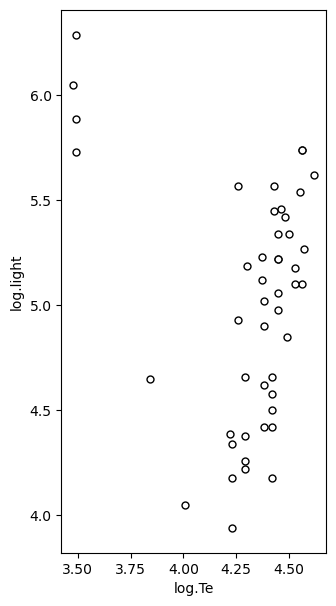

In [8]:
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', s=25, edgecolors='k')
plt.xlabel("log.Te")
plt.ylabel("log.light")
plt.show()

[4.31       5.01212766]


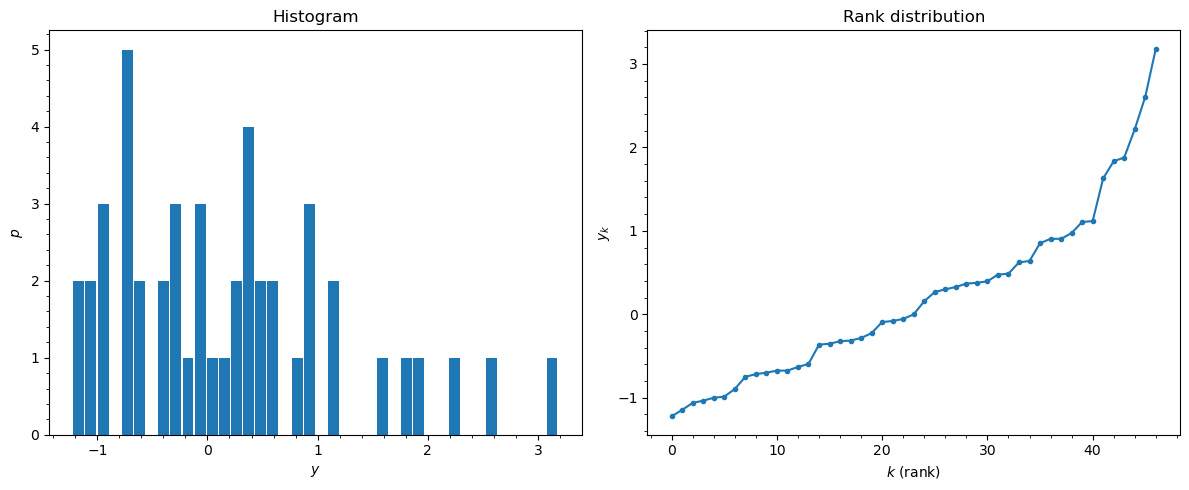

In [9]:
c0 = loc.location(X0)
print(c0)
plots.plot_hist_and_rank_distribution(
    modified_zscore(loc.distance_center(X0, c0)))

In [10]:
X1 = X0 - c0

In [11]:
As, Ls, Us = pca.find_pc_all(X1, 2)
a1_0 = As[0]
a2_0 = As[1]

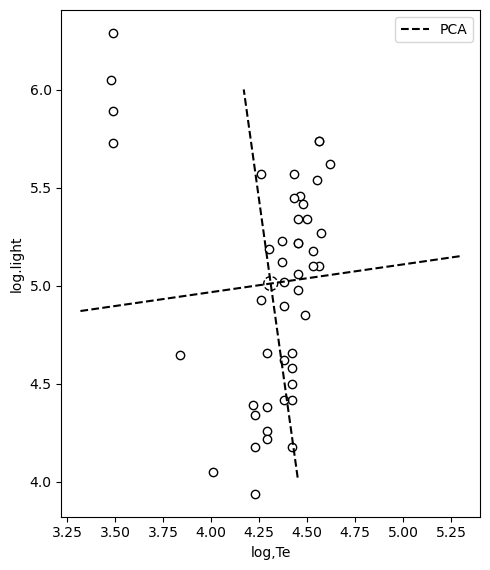

In [12]:
plt.figure(figsize=(5, 5.8))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.plot([c0[0]-a1_0[0], c0[0], c0[0]+a1_0[0]], [c0[1]-a1_0[1], c0[1], c0[1]+a1_0[1]], 
         c='k', linestyle='--', label='PCA')
plt.plot([c0[0]-a2_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]-a2_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--')
plt.legend()
plt.xlabel('log,Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.show()

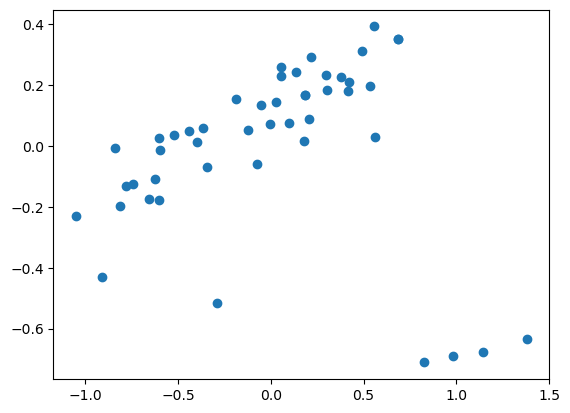

In [13]:
plt.scatter(Us[0], Us[1])
plt.show()

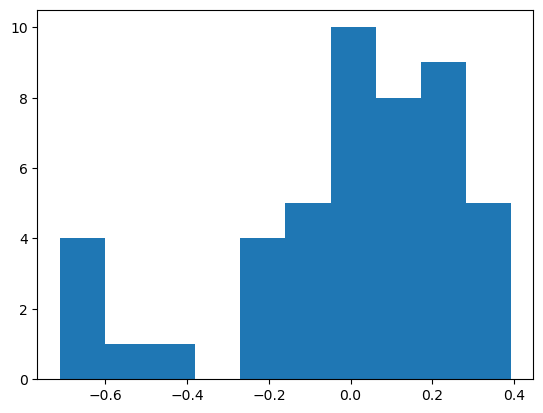

In [14]:
plt.hist(Us[1], bins=10)
plt.show()

[4.34978651 4.84937297]


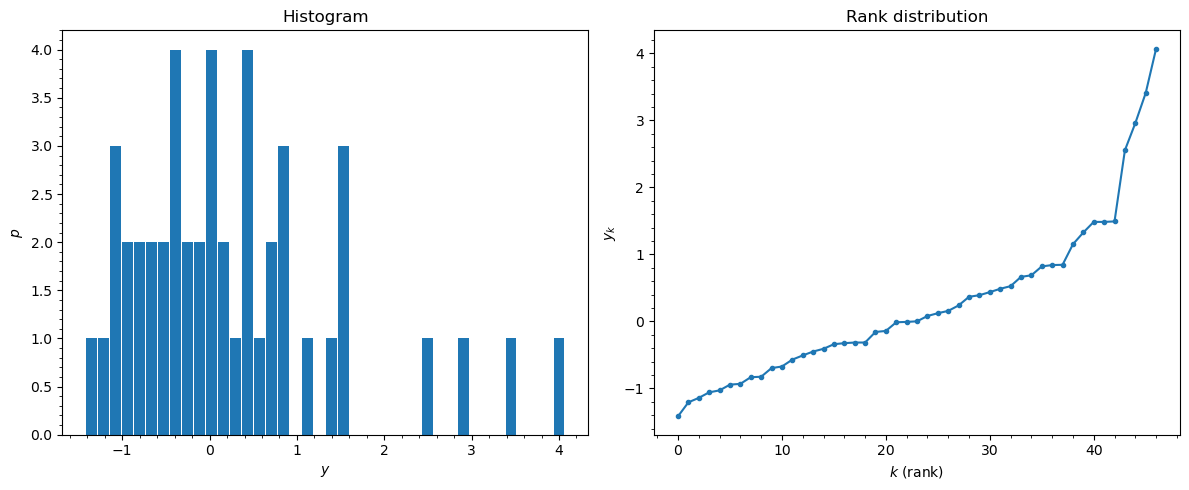

In [15]:
wma = aggfuncs.CMMean(funcs.SoftQuantileFunc(funcs.SoftAbs(0.001), alpha))
c = loc.robust_location(X0, wma)
print(c)
plots.plot_hist_and_rank_distribution(
    modified_zscore(loc.distance_center(X0, c)))

In [22]:
X1 = X0 - c

0.35205619616499473 [-0.15025247  0.98864766]


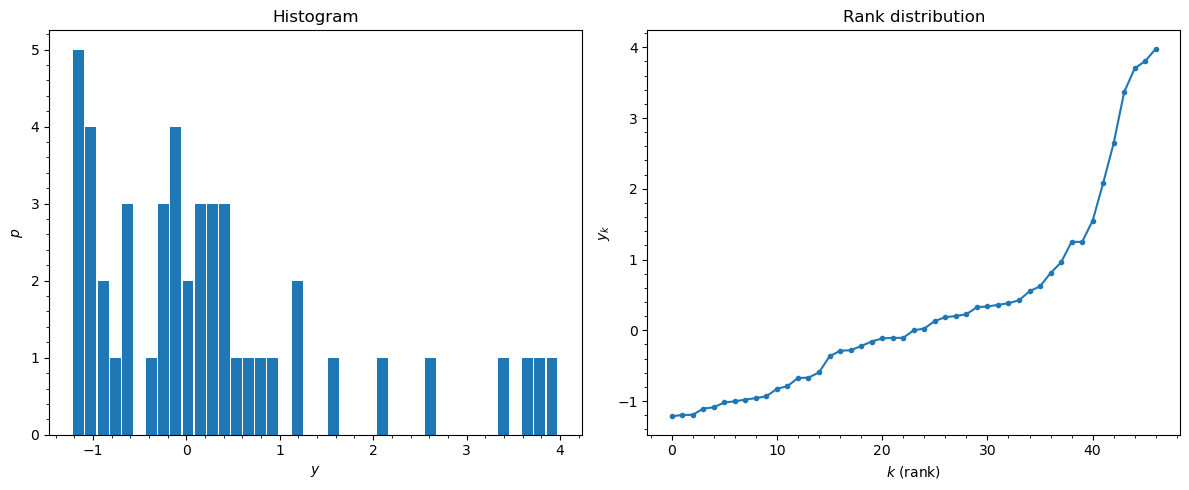

In [23]:
a1, L1 = pca.find_pc(X1)
print(L1, a1)
plots.plot_hist_and_rank_distribution(
    modified_zscore(pca.distance_line(X1, a1)))

0.26542904719414817 [0.18283308 0.98314397]


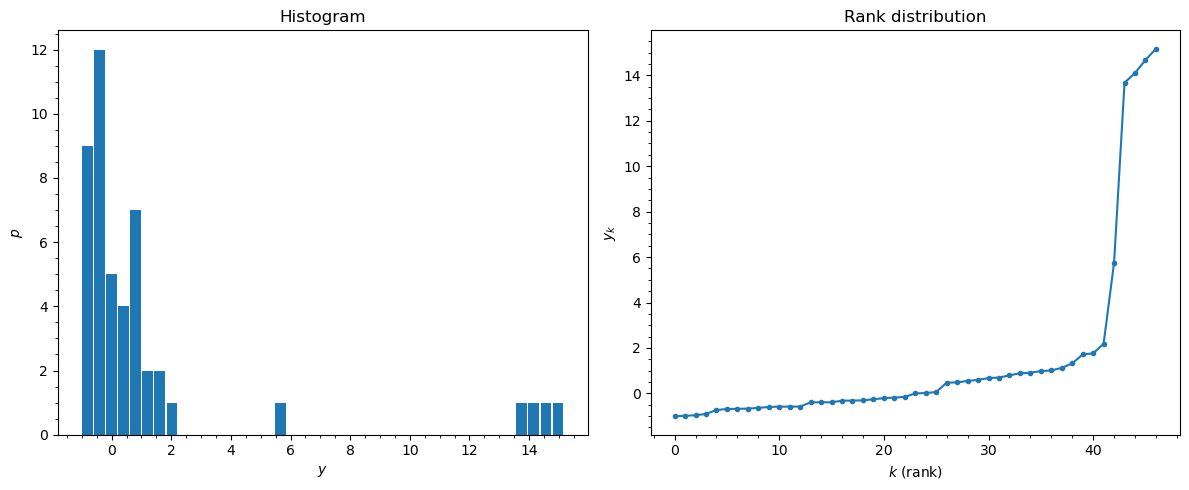

In [24]:
# alpha = (N-5)/N
# wma = af.averaging_function("WMZ", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001), kwds={'alpha':5.0})
a1, L1 = pca.find_robust_pc(X1, wma, tol=1.0e-8)
print(L1, a1)
plots.plot_hist_and_rank_distribution(
    modified_zscore(pca.distance_line(X1, a1)))

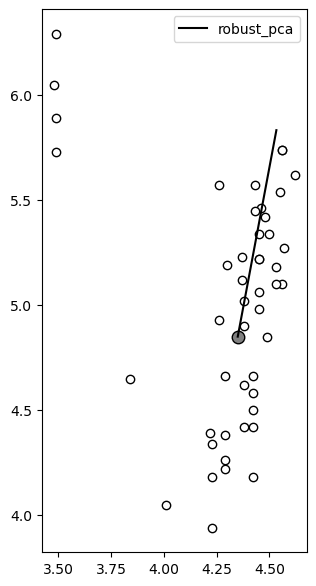

In [25]:
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='grey', edgecolors='k')
plt.plot([c[0], c[0]+a1[0]], [c[1], c[1]+a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()

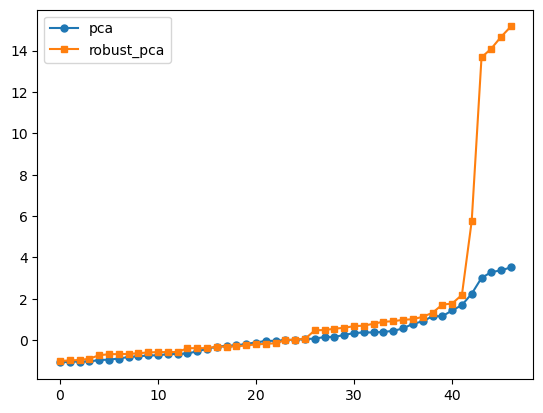

In [26]:
plt.plot(sorted(
         modified_zscore(pca.distance_line(X1_0, a1_0))), 
         marker='o', markersize=5, label='pca')
plt.plot(sorted(
         modified_zscore(pca.distance_line(X1, a1))), 
         marker='s', markersize=5, label='robust_pca')
plt.legend()
plt.show()

In [27]:
X2 = pca.project(X1, a1)

0.012279454679188964 [ 0.98314397 -0.18283308]


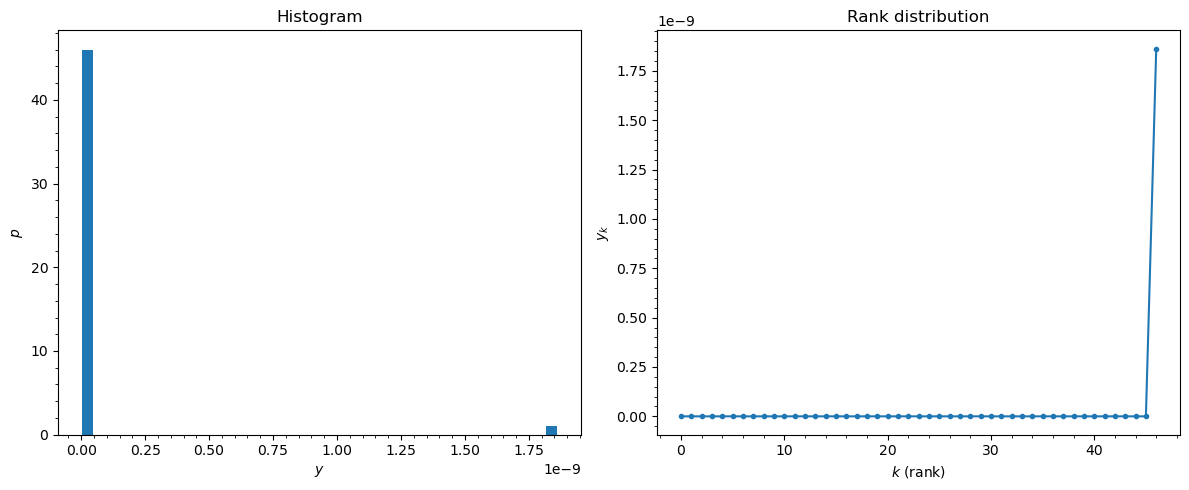

In [30]:
# alpha = (N-8)/N
# wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma, tol=1.0e-9)
print(L2, a2)
plots.plot_hist_and_rank_distribution(pca.distance_line(X2, a2))

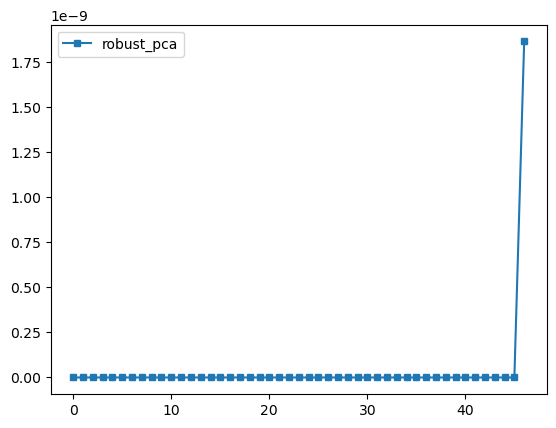

In [32]:
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

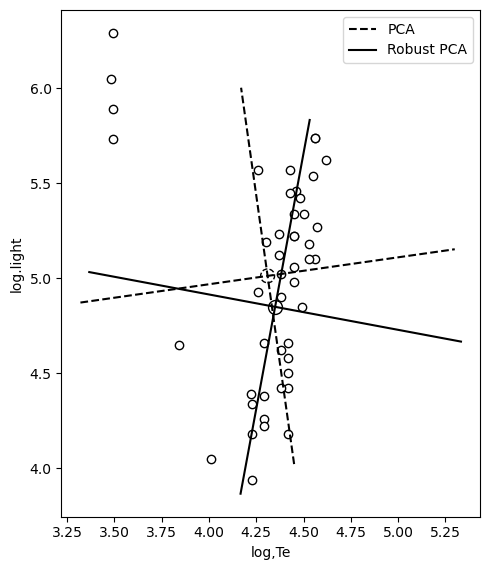

In [33]:
plt.figure(figsize=(5, 5.8))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]-a1_0[0], c0[0], c0[0]+a1_0[0]], [c0[1]-a1_0[1], c0[1], c0[1]+a1_0[1]], 
         c='k', linestyle='--', label='PCA')
plt.plot([c0[0]-a2_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]-a2_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--')
plt.plot([c[0]-a1[0], c[0], c[0]+a1[0]], [c[1]-a1[1], c[1], c[1]+a1[1]], 
         c='k', label='Robust PCA')
plt.plot([c[0]-a2[0], c[0], c[0]+a2[0]], [c[1]-a2[1], c[1], c[1]+a2[1]], 
         c='k')
plt.legend()
plt.xlabel('log,Te')
plt.ylabel('log.light')
plt.tight_layout()
# plt.savefig('fig/robust_pca_starsCYG_0.eps')
plt.show()

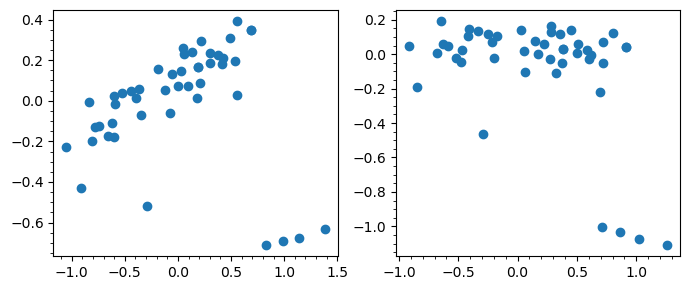

In [34]:
U1 = X1 @ a1
U2 = X1 @ a2

U1_0 = X1_0 @ a1_0
U2_0 = X1_0 @ a2_0

plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.scatter(U1_0, U2_0)
plt.minorticks_on()
plt.subplot(1,2,2)
plt.scatter(U1, U2)
plt.minorticks_on()
plt.tight_layout()
plt.show()


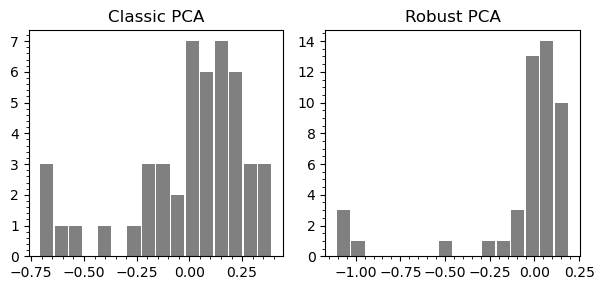

In [35]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.title('Classic PCA')
plt.hist(U2_0, bins=16, rwidth=0.9, color='Grey')
plt.minorticks_on()
plt.subplot(1,2,2)
plt.title('Robust PCA')
plt.hist(U2, bins=16, rwidth=0.9, color='Grey')
plt.minorticks_on()
plt.tight_layout()
plt.show()
